In [245]:
# Import libraries--------------------------

# Dataset handling--------------------------
import pandas as pd

# Manage outliers---------------------------
import numpy as np
from scipy.stats import zscore

# Standardize values------------------------
from sklearn.preprocessing import StandardScaler

# ML models---------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# Ploting-----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Dimension reduction-----------------------
from sklearn.decomposition import PCA

# Metrics for clusterization----------------
from sklearn.metrics import silhouette_score

# 3D visualization--------------------------
import plotly.graph_objects as go

# Pre-processing

### Read file, sample df, drop columns, remove outliers, satandardize values

In [3]:
df_flights = pd.read_csv('DelayedFlights.csv')

In [4]:
df_flights.shape

(1936758, 30)

In [5]:
df_flights.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [6]:
df_flights_drop = df_flights.dropna()

In [7]:
df_flights_drop.shape

(1247486, 30)

In [8]:
df_flights_drop_sample = df_flights_drop.sample(n=100000)

In [9]:
# Drop categorical columns
df_flights_drop_sample = df_flights_drop_sample.drop(columns=['CRSElapsedTime',
                                                              'DepTime', 
                                                              'CRSDepTime', 
                                                              'ArrTime', 
                                                              'CRSArrTime', 
                                                              'CarrierDelay',
                                                              'WeatherDelay',
                                                              'NASDelay',
                                                              'SecurityDelay',
                                                              'LateAircraftDelay',
                                                              'Month',
                                                              'DayofMonth',
                                                              'DayOfWeek',
                                                              'Cancelled',
                                                              'Diverted',
                                                              'Unnamed: 0',
                                                              'Year',
                                                              'FlightNum',
                                                              'UniqueCarrier',
                                                              'TailNum',
                                                              'Origin',
                                                              'Dest',
                                                              'CancellationCode'])

In [10]:
df_flights_drop_sample.head()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
1596037,92.0,38.0,57.0,30.0,215,5.0,49.0
1460642,96.0,74.0,37.0,49.0,607,5.0,17.0
1381217,340.0,306.0,71.0,46.0,2518,12.0,22.0
977520,131.0,107.0,16.0,26.0,678,4.0,20.0
966063,148.0,118.0,31.0,49.0,733,4.0,26.0


In [11]:
# IGNORE
#print(df_flights_drop.columns)
#df_flights_drop.head(1)

In [12]:
# Remove outliers with standard deviation bigger than 3
df_flights_drop_sample_nooutl = df_flights_drop_sample[(np.abs(zscore(df_flights_drop_sample)) < 3).all(axis=1)]

# IGNORE
#df_flights_drop_sample_nooutl.columns
#df_flights_drop_sample_nooutl.head(1)

In [13]:
# IGNORE
#df_flights_drop_sample_nooutl.describe()

In [14]:
# Standardize values
scaler = StandardScaler()
df_flights_drop_sample_std = scaler.fit_transform(df_flights_drop_sample_nooutl)

In [15]:
# IGNORE
#df_flights_drop_sample_std[0:1]

# Nivell 1

## Exercici 1
Classifica els diferents vols utilitzant l'algorisme de K-means.

### Cluster using sample df with 100.000 values

In [16]:
# Create sum of squared error list to hold this values (inertia_) in order to see what´s the best value for k (Elbow Method)
sse = []
for k in range(1, 11):
    classifier_kmeans = KMeans(n_clusters=k)
    classifier_kmeans.fit(df_flights_drop_sample_std)
    sse.append(classifier_kmeans.inertia_)

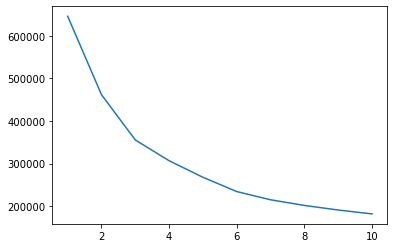

In [17]:
plt.plot(range(1, 11), sse)

**Using the "Elbow Method"  we realize the best value for k is 3, so we´ll run the model again using this k**  

**As we can see, the inertia_ values are really high. This might be beacuse of the amount of data points we are considering.**  

In [18]:
# Run again with k=3
classifier_kmeans = KMeans(n_clusters=3)
classifier_kmeans.fit(df_flights_drop_sample_std)

KMeans(n_clusters=3)

**Inertia:**  

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia and a low number of clusters (K).

In [19]:
print(f'Inertia: {classifier_kmeans.inertia_:.3f}')

Inertia: 355407.889


**Silhouette Score:**  

The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.

In [20]:
print(f'Silhouette Score: {silhouette_score(df_flights_drop_sample_std, classifier_kmeans.labels_)}')

Silhouette Score: 0.3293512074148979


**Predict Labels**

In [21]:
classifier_kmeans.predict(df_flights_drop_sample_std)

array([0, 0, 0, ..., 0, 2, 0])

In [22]:
# Print labels count
print(f'Label 0: {classifier_kmeans.labels_.tolist().count(0)}')
print(f'Label 1: {classifier_kmeans.labels_.tolist().count(1)}')
print(f'Label 2: {classifier_kmeans.labels_.tolist().count(2)}')
print(f'Sum of all labels: {len(classifier_kmeans.labels_.tolist())}')

Label 0: 54341
Label 1: 22957
Label 2: 14940
Sum of all labels: 92238


In [23]:
# Add 'labels' column on original pre-processed df
df_flights_drop_sample_nooutl['Labels'] = classifier_kmeans.labels_
df_flights_drop_sample_nooutl.head()

<ipython-input-23-d39991c9e9eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights_drop_sample_nooutl['Labels'] = classifier_kmeans.labels_


,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Labels
1596037,92.0,38.0,57.0,30.0,215,5.0,49.0,0
1460642,96.0,74.0,37.0,49.0,607,5.0,17.0,0
977520,131.0,107.0,16.0,26.0,678,4.0,20.0,0
966063,148.0,118.0,31.0,49.0,733,4.0,26.0,0
277549,76.0,50.0,27.0,16.0,223,2.0,24.0,0


In [24]:
# Group by Labels in order to withdraw first conclusions about it
df_flights_drop_sample_nooutl.groupby('Labels').mean()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
Labels,,,,,,,
0,95.094514,71.202996,38.759776,38.123516,449.921238,6.262049,17.629469
1,209.086030,180.365771,46.690987,42.306922,1330.617764,7.454502,21.265758
2,117.535207,90.103414,134.227510,132.683601,594.765663,7.107965,20.323829


### Clusters interpretation:  
**Label 0** - Smaller distance flights, lowest mean delay and taxi times  
**Label 1** - Bigger distance flights, medium mean delay  
**Label 2** - Medium distance flights, highest mean delay  

### Conclusion:  
There seems to be some problem with the ***medium distance flights***, more likely on the ground than on the air.

### Cluster using sample df with PCA  
I´ll use the same steps as before just adding the PCA method before fitting again

In [25]:
# Create PCA object
pca = PCA(n_components=2)

In [26]:
df_flights_drop_std_pca = pca.fit_transform(df_flights_drop_sample_std)

In [27]:
df_flights_drop_std_pca.shape

(92238, 2)

In [28]:
# 
sse = []
for k in range(1, 11):
    classifier_kmeans = KMeans(n_clusters=k)
    classifier_kmeans.fit(df_flights_drop_std_pca)
    sse.append(classifier_kmeans.inertia_)

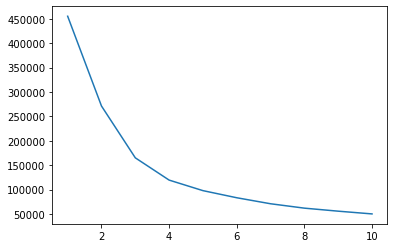

In [29]:
plt.plot(range(1, 11), sse)

In [30]:
classifier_kmeans = KMeans(n_clusters=3)
classifier_kmeans.fit(df_flights_drop_std_pca)

KMeans(n_clusters=3)

In [31]:
classifier_kmeans.predict(df_flights_drop_std_pca)

array([2, 2, 2, ..., 2, 1, 2])

In [32]:
inertia = classifier_kmeans.inertia_
silhouette = silhouette_score(df_flights_drop_sample_std, classifier_kmeans.labels_)

In [33]:
print(f'Inertia: {inertia:.3f}')
print(f'Silhouette Score: {silhouette}')

Inertia: 165161.299
Silhouette Score: 0.3296136118558918


We can see that there was an **important improvement on inertia score** and a **small improvement on silhouette**.

In [34]:
# Print labels count
print(f'Label 0: {classifier_kmeans.labels_.tolist().count(0)}')
print(f'Label 1: {classifier_kmeans.labels_.tolist().count(1)}')
print(f'Label 2: {classifier_kmeans.labels_.tolist().count(2)}')
print(f'Sum of all labels: {len(classifier_kmeans.labels_.tolist())}')

Label 0: 22944
Label 1: 14943
Label 2: 54351
Sum of all labels: 92238


In [35]:
# Add 'labels' column on original pre-processed df
df_flights_drop_sample_nooutl['Labels'] = classifier_kmeans.labels_

<ipython-input-35-96d8cda8ccde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights_drop_sample_nooutl['Labels'] = classifier_kmeans.labels_


In [36]:
# Group by Labels in order to withdraw first conclusions about it
df_flights_drop_sample_nooutl.groupby('Labels').mean()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
Labels,,,,,,,
0,209.180744,180.236532,46.778984,42.224677,1329.247734,7.492765,21.451447
1,117.548484,90.117915,134.220572,132.687078,595.008432,7.095028,20.335542
2,95.076908,71.278633,38.721164,38.153061,450.635499,6.249692,17.548582


**As we can see the labels just "changed order" but the values are the same as before (or really close).  
That´s normal on Kmeans algorithym, since it´s non-deterministic, due to its random selection of data points as initial centroids.**

### Plot data points and centroids (using results from PCA approach)

In [37]:
df = pd.DataFrame(df_flights_drop_std_pca)

In [38]:
df = pd.concat([df, pd.DataFrame(classifier_kmeans.labels_, columns=['Label'])], axis=1)
df

,0,1,Label
0,-1.266391,-0.189988,2
1,-0.746902,-0.408534,2
2,-0.024405,-1.145101,2
3,0.383277,-0.512404,2
4,-1.650505,-1.065415,2
...,...,...,...
92233,-0.379466,-0.368607,2
92234,-1.259850,2.423251,1
92235,0.142991,-1.239384,2
92236,-0.834184,5.555971,1


In [39]:
# IGNORE
#Plot point by point using matplotlib
#for i in range(len(df_flights_drop_std_pca)):
    #print(df_flights_drop_std_pca[i][0])
#    plt.scatter(df_flights_drop_std_pca[i][0], df_flights_drop_std_pca[i][1])
    #sns.scatterplot(x=df.iloc[i][0], y=df.iloc[i][1], hue=df['Label'])
#plt.show()    

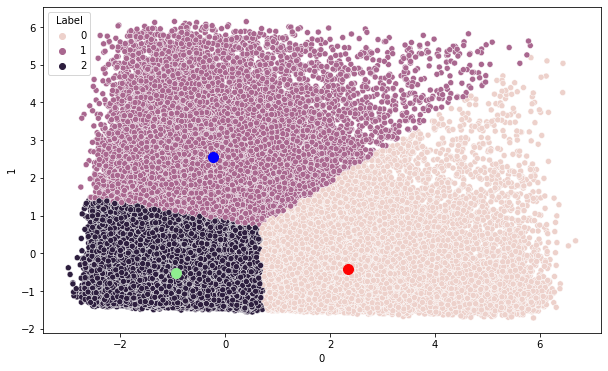

In [40]:
# Plot points and centroids using matplotlib and seaborn
plt.figure(figsize = (10, 6))
sns.scatterplot(data=df, x=df[0], y=df[1], hue='Label')
plt.scatter(classifier_kmeans.cluster_centers_[0][0], classifier_kmeans.cluster_centers_[0][1], c='red', s=100)
plt.scatter(classifier_kmeans.cluster_centers_[1][0], classifier_kmeans.cluster_centers_[1][1], c='blue', s=100)
plt.scatter(classifier_kmeans.cluster_centers_[2][0], classifier_kmeans.cluster_centers_[2][1], c='lightgreen', s=100)
plt.show()

# Nivell 2

## Exercici 2
Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

**1 - I´ll plot 2 graphs just to understand a little better how clustering with dendrogram works.**

**1.1 - Dendogram with the first 10 points of the PCA classififer.**

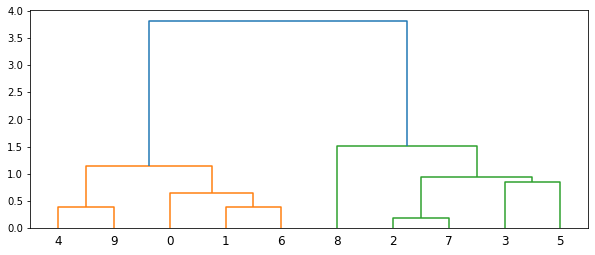

In [127]:
plt.figure(figsize=(10, 4))
hierarchy.dendrogram(hierarchy.linkage(df_flights_drop_std_pca[0:10], method='ward'))#, p=3, truncate_mode='lastp')
plt.show()

**2.1 - Scatter plot showing the same first 10 points.**

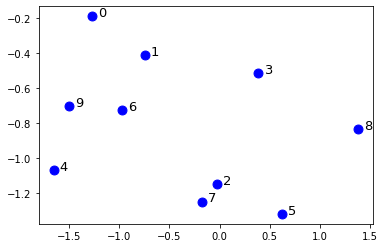

In [98]:
# Loop the first 10 points in the PCA dataset, plot each point and index to identify it
for i in range(len(df_flights_drop_std_pca[0:10])):
    plt.scatter(df_flights_drop_std_pca[i, 0], df_flights_drop_std_pca[i, 1], s=80, c='blue')
    plt.text(df_flights_drop_std_pca[i,0]+0.06, df_flights_drop_std_pca[i,1], str(i), fontsize=13)
plt.show()    

**With this 2 graphs we can visualize how the closest points are clustered together on the different levels of the dendrogram.**

**2 - I´ll follow with the exercise plotting another dendrogram.**

Since dendrogram uses a lot of memory I´ll use just over 10k samples, from the PCA dataset, and 10 clusters.

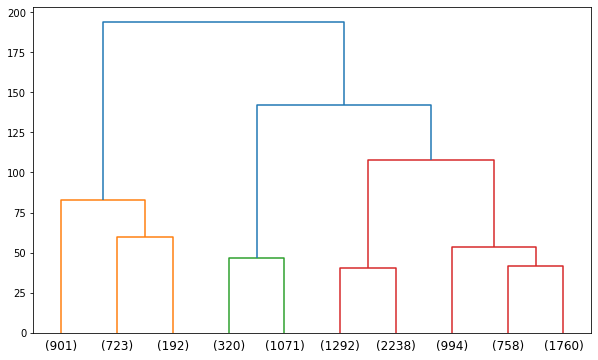

In [128]:
plt.figure(figsize=(10, 6))
hierarchy.dendrogram(hierarchy.linkage(df_flights_drop_std_pca[::9], method='ward'), p=10, truncate_mode='lastp')
plt.show()

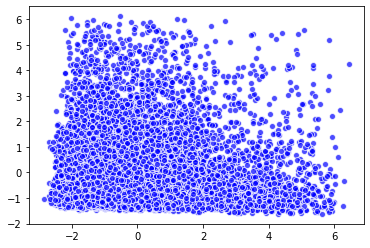

In [130]:
# Plot points used to make the dendrogram
for i in range(len(df_flights_drop_std_pca[::9])):
    plt.scatter(df_flights_drop_std_pca[i, 0], df_flights_drop_std_pca[i, 1], c='blue', alpha=0.7, edgecolors='white')
    #plt.text(df_flights_drop_std_pca[i,0]+0.06, df_flights_drop_std_pca[i,1], str(i), fontsize=13)
plt.show()

**3 - Cluster sample dataset**

In [131]:
# Create Agglomerative object
classifier_agglom = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [133]:
# Predict labels for the 10k+ dataset we´ve choosen previously
y_pred_classifier_agglom = classifier_agglom.fit_predict(df_flights_drop_std_pca[::9])

<AxesSubplot:>

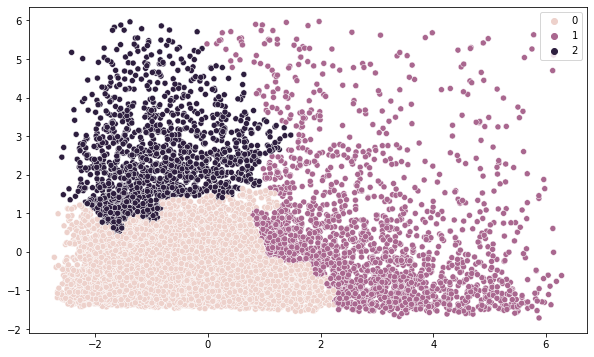

In [159]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_flights_drop_std_pca[::9, 0], y=df_flights_drop_std_pca[::9, 1], hue=y_pred_classifier_agglom)

In [177]:
# Silhouette Score
print(f'Silhouette Score for agglomerative clustering with 10k+ samples: {silhouette_score(df_flights_drop_std_pca[::9], y_pred_classifier_agglom)}')

Silhouette Score for agglomerative clustering with 10k+ samples: 0.42088998081881374


In [169]:
# Create dataframe with the same 10k+ elements and using the non-standardized dataframe
df_agglom = df_flights_drop_sample_nooutl[::9]

In [171]:
# Add labels to dataframe 
df_agglom['Labels'] = y_pred_classifier_agglom

<ipython-input-171-253324bc37f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agglom['Labels'] = y_pred_classifier_agglom


In [173]:
# Group by labels and check the mean of each column
df_agglom.groupby('Labels').mean()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
Labels,,,,,,,
0,108.184465,83.361829,38.373899,37.078103,545.779892,6.493468,18.329168
1,227.737885,197.769273,73.447687,68.579295,1476.395925,7.634912,22.333700
2,94.942487,69.468009,127.704529,127.290439,430.346513,6.703091,18.771387


**In comparison with the kmeans clustering we can see that some of the information has changed.**  

**At first, I imagine it´s because the considerable lesser amount of data we used for this model.**

# Nivell 3

### Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

**It´s done on the previous exercises.**

# Extra

### PCA with 3 components

In [178]:
pca_3c = PCA(n_components=3)

In [260]:
df_flights_drop_sample_std_pca3c = pca_3c.fit_transform(df_flights_drop_sample_std[::9])

In [261]:
df_flights_drop_sample_std_pca3c.shape

(10249, 3)

In [262]:
y_pred_classifier_kmeans = classifier_kmeans.fit_predict(df_flights_drop_sample_std_pca3c)

In [275]:
print(f'Inertia PCA 3 components: {classifier_kmeans.inertia_}')
print(f'Silhouette Score PCA 3 components: {silhouette_score(df_flights_drop_sample_std_pca3c, y_pred_classifier_kmeans)}')

Inertia PCA 3 components: 29614.673076320163
Silhouette Score PCA 3 components: 0.3808975096128917


In [272]:
# Plot 3D graph using Plotly
fig = px.scatter_3d(df_flights_drop_sample_std_pca3c,
                    x=df_flights_drop_sample_std_pca3c[::,0],
                    y=df_flights_drop_sample_std_pca3c[::,1],
                    z=df_flights_drop_sample_std_pca3c[::,2],
                    color=y_pred_classifier_kmeans,
                    labels=y_pred_classifier_kmeans,
                    opacity=0.6,
                    title='PCA 3 components',
                    width=1000,
                    height=700,
                    size_max=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=100))
fig.show()